In [1]:
import sys
sys.path.append('../src/')
from my_solver import MySolver
import numpy as np
import matplotlib.pyplot as plt
DSET_PATH = 'C:/Users/Administrator/Desktop/prv/KacperBugala/wsi/cardio_dataset/cardio_train.csv'

In [2]:
solver = MySolver()

In [3]:
solver.load(DSET_PATH, 'cardio', non_discrete=['weight', 'height', 'age', 'ap_hi', 'ap_lo'])

In [4]:
split_rules = [
    (0.1, 0.7, 0.2),
    (0.2, 0.6, 0.2),
    (0.3, 0.5, 0.2),
    (0.4, 0.4, 0.2),
    (0.5, 0.3, 0.2),
    (0.6, 0.2, 0.2),
    (0.7, 0.1, 0.2),
]

SIM_COUNT = 5

train_accs = []
valid_accs = []

for split_no, split in enumerate(split_rules):
    split_train_accs = []
    split_valid_accs = []
    for sim in range(SIM_COUNT):
        X_train, X_valid, X_test, Y_train, Y_valid, Y_test = solver.split_data(split)
        train_acc, valid_acc = solver.evaluate_train_valid(X_train, Y_train, X_valid, Y_valid)
        split_train_accs.append(train_acc)
        split_valid_accs.append(valid_acc)
    print(f'===============================================================\n \
            Split rule no. {split_no}\n \
            ----------------------\n \
            Train_set prediction mean accuracy: {np.mean(split_train_accs)}\n \
            Validation_set prediciton mean accuracy:{np.mean(split_valid_accs)}')
    train_accs.append(np.mean(split_train_accs))
    valid_accs.append(np.mean(split_valid_accs))


             Split rule no. 0
             ----------------------
             Train_set prediction mean accuracy: 0.5879525412858746
             Validation_set prediciton mean accuracy:0.5883116883116882
             Split rule no. 1
             ----------------------
             Train_set prediction mean accuracy: 0.5922582972582973
             Validation_set prediciton mean accuracy:0.5943434343434343
             Split rule no. 2
             ----------------------
             Train_set prediction mean accuracy: 0.586382189239332
             Validation_set prediciton mean accuracy:0.5867676767676768
             Split rule no. 3
             ----------------------
             Train_set prediction mean accuracy: 0.5881577681577681
             Validation_set prediciton mean accuracy:0.5880519480519482
             Split rule no. 4
             ----------------------
             Train_set prediction mean accuracy: 0.5777893217893217
             Validation_set prediciton mean

In [5]:
KFOLD_RANGE = 8

SIM_COUNT = 5


cv_train_accs = []
cv_valid_accs = []
for k in range(3, KFOLD_RANGE):
    split_train_accs = []
    split_valid_accs = []
    for sim in range(SIM_COUNT):
        X, Y = solver.split_cross_validation(k)
        train_acc, valid_acc = solver.evaluate_cross_validation(X, Y)
        split_train_accs.append(np.mean(train_acc))
        split_valid_accs.append(np.mean(valid_acc))
    
    print(f'===============================================================\n \
            {k}-fold split\n \
            ----------------------\n \
            Train_set prediction mean accuracy: {np.mean(split_train_accs)}\n \
            Validation_set prediciton mean accuracy:{np.mean(split_valid_accs)}')
    cv_train_accs.append(np.mean(split_train_accs))
    cv_valid_accs.append(np.mean(split_valid_accs))

             3-fold split
             ----------------------
             Train_set prediction mean accuracy: 0.5877070707070707
             Validation_set prediciton mean accuracy:0.5874862914862915
             4-fold split
             ----------------------
             Train_set prediction mean accuracy: 0.5887926887926888
             Validation_set prediciton mean accuracy:0.5885858585858585
             5-fold split
             ----------------------
             Train_set prediction mean accuracy: 0.587997113997114
             Validation_set prediciton mean accuracy:0.588005772005772
             6-fold split
             ----------------------
             Train_set prediction mean accuracy: 0.5884709956709957
             Validation_set prediciton mean accuracy:0.5885281385281386
             7-fold split
             ----------------------
             Train_set prediction mean accuracy: 0.5884708994708994
             Validation_set prediciton mean accuracy:0.588424242

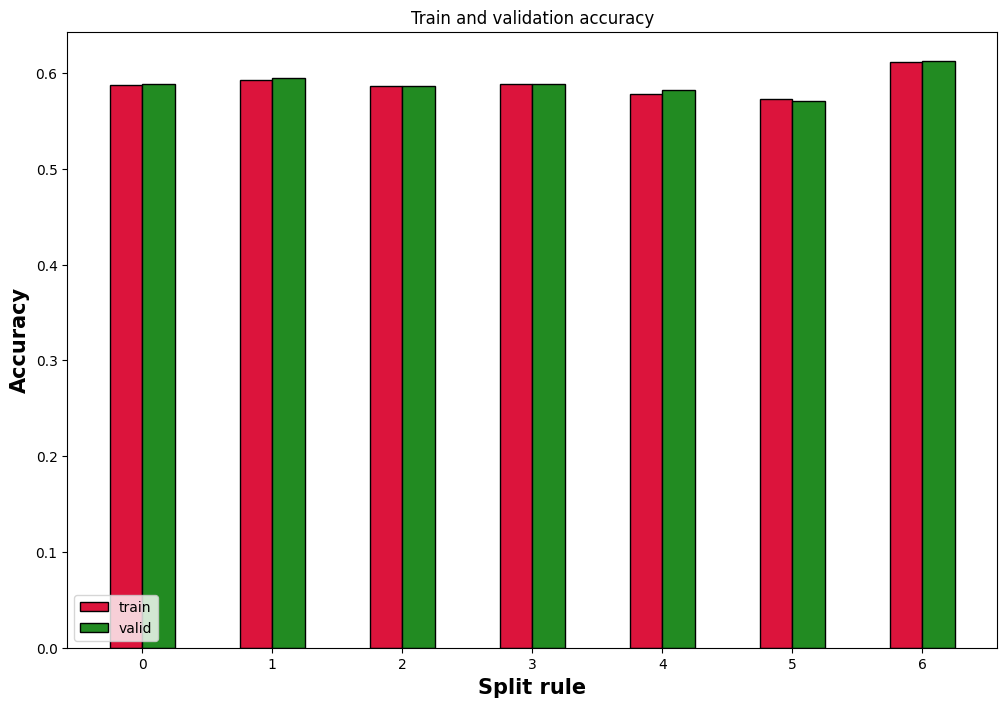

In [17]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
br1 = np.arange(len(train_accs)) - barWidth/2
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, train_accs, color ='crimson', width = barWidth,
        edgecolor ='black', label ='train')
plt.bar(br2, valid_accs, color ='forestgreen', width = barWidth,
        edgecolor ='black', label ='valid')
 
# Adding Xticks
plt.xlabel('Split rule', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.title('Train and validation accuracy')
plt.legend(loc='lower left')
plt.show()

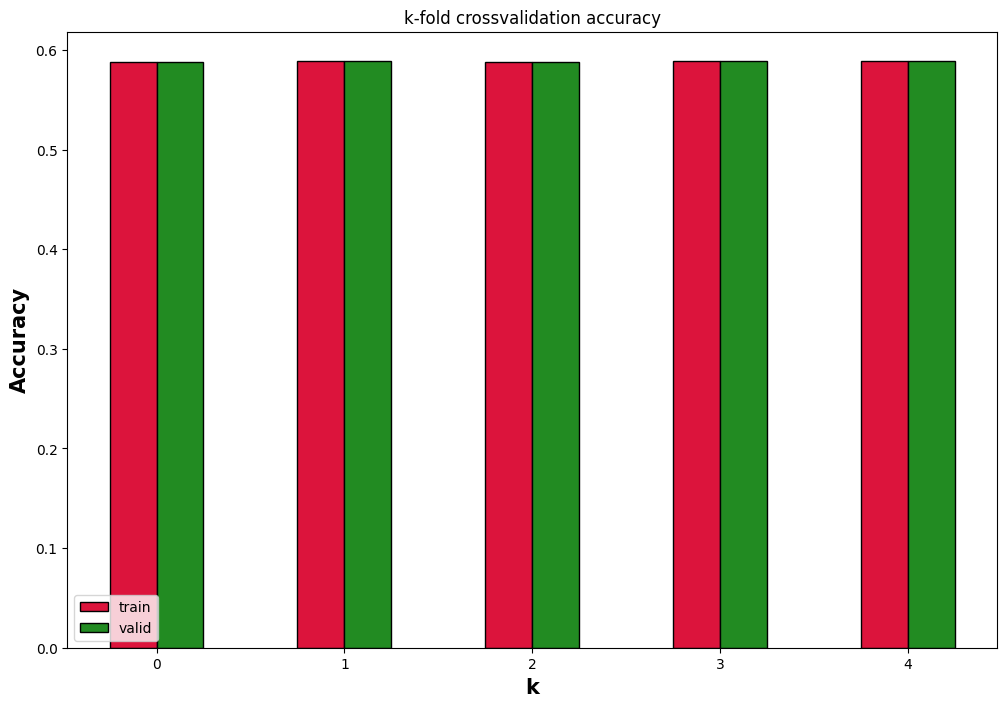

In [16]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
br1 = np.arange(len(cv_train_accs)) - barWidth/2
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, cv_train_accs, color ='crimson', width = barWidth,
        edgecolor ='black', label ='train')
plt.bar(br2, cv_valid_accs, color ='forestgreen', width = barWidth,
        edgecolor ='black', label ='valid')
 
# Adding Xticks
plt.xlabel('k', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
# plt.xticks([r + barWidth for r in range(len(IT))],
        # ['0', '2016', '2017', '2018', '2019'])
plt.title('k-fold crossvalidation accuracy')
plt.legend(loc='lower left')
plt.show()